In [1]:
import specdal
from matplotlib import pyplot as plt

# Processing a single Spectrum

Specdal provides readers which loads [.asd, .sig, .sed] files into a common Spectrum object.

In [2]:
s = specdal.Spectrum(filepath="/home/young/data/specdal/aidan_data/SVC/ACPA_F_B_SU_20160617_003.sig")
print(s)


name:		ACPA_F_B_SU_20160617_003,
measure_type:	pct_reflect
measurements:	wave  |measurement
		------|-----------
		 337.9|0.146
		   ...|...
		2508.3|0.075
metadata:	file:/home/young/data/specdal/aidan_data/SVC/ACPA_F_B_SU_20160617_003.sig
		instrument_type:SIG
		integration_time:37.5
		measurement_type:Radiance
		gps_time_tgt:None
		gps_time_ref:None
		wavelength_range:(337.89999999999998, 2508.3000000000002)



The print output shows the four components of the Spectrum object. For example, we can access the measurements as follows.

In [3]:
print(type(s.measurement))
print(s.measurement.head())

<class 'pandas.core.series.Series'>
wavelength
337.9    0.1455
339.4    0.1422
340.9    0.1391
342.4    0.1541
344.0    0.1475
Name: pct_reflect, dtype: float64


Spectrum object provides several methods for processing the measurements. Let's start by linearly resampling to the nearest integer (nm) wavelengths.

In [4]:
s.interpolate(method='linear')
print(s.measurement.head())

wavelength
338.0    0.14440
339.0    0.14330
340.0    0.14065
341.0    0.14410
342.0    0.14910
Name: pct_reflect, dtype: float64


We can visualize the spectrum using pyplot. spectrum.plot is just a wrapper around spectrum.measurements.plot, so you can pass any arguments for plotting pandas.Series objects.

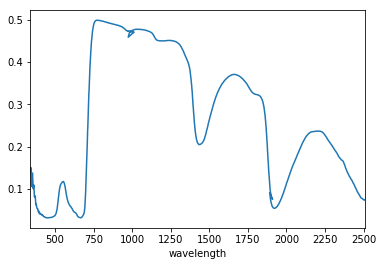

In [5]:
s.plot()
plt.show()

There are folds in the spectrum near 1000 and 1900 wavelengths. This happens because the three bands in the spectrometer has overlapping wavelengths. We can fix this using the stitch method of the Spectrum class.

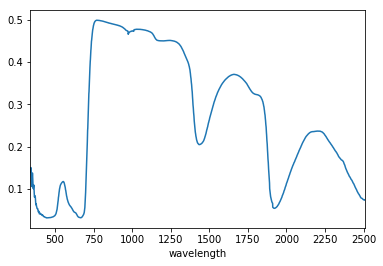

In [6]:
s.stitch(method='mean')
s.plot()
plt.show()